In [1]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [33]:
array, sampling_rate

(array([-1.4068211e-03, -4.4607485e-04, -4.1098098e-04, ...,
         7.9623042e-06, -3.0417003e-05,  1.2765069e-05], dtype=float32),
 22050)

In [24]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def show(signal_array, title = None, xrange:tuple = None):
    fig, ax = plt.subplots(figsize = (15,4))
    if title:
        plt.title(title)
    if xrange:
        plt.xlim(*xrange)
    plt.plot(signal_array)
    plt.grid(linestyle = '--')
    plt.show()

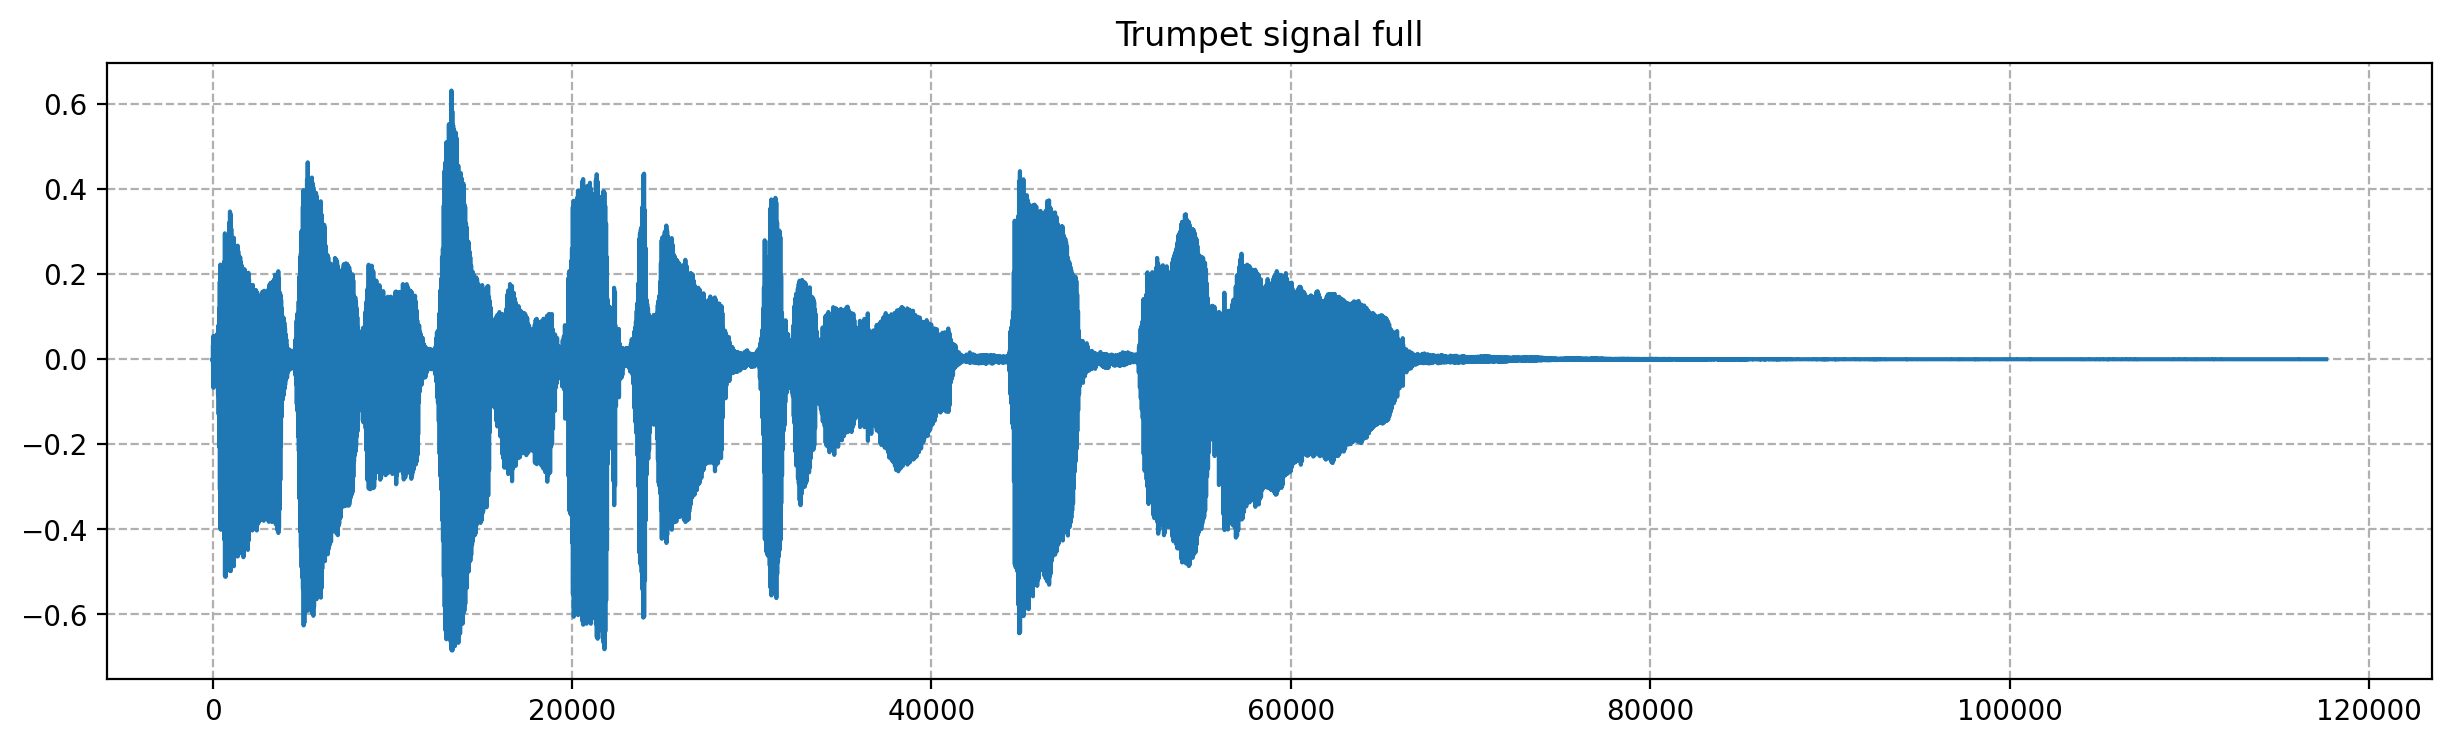

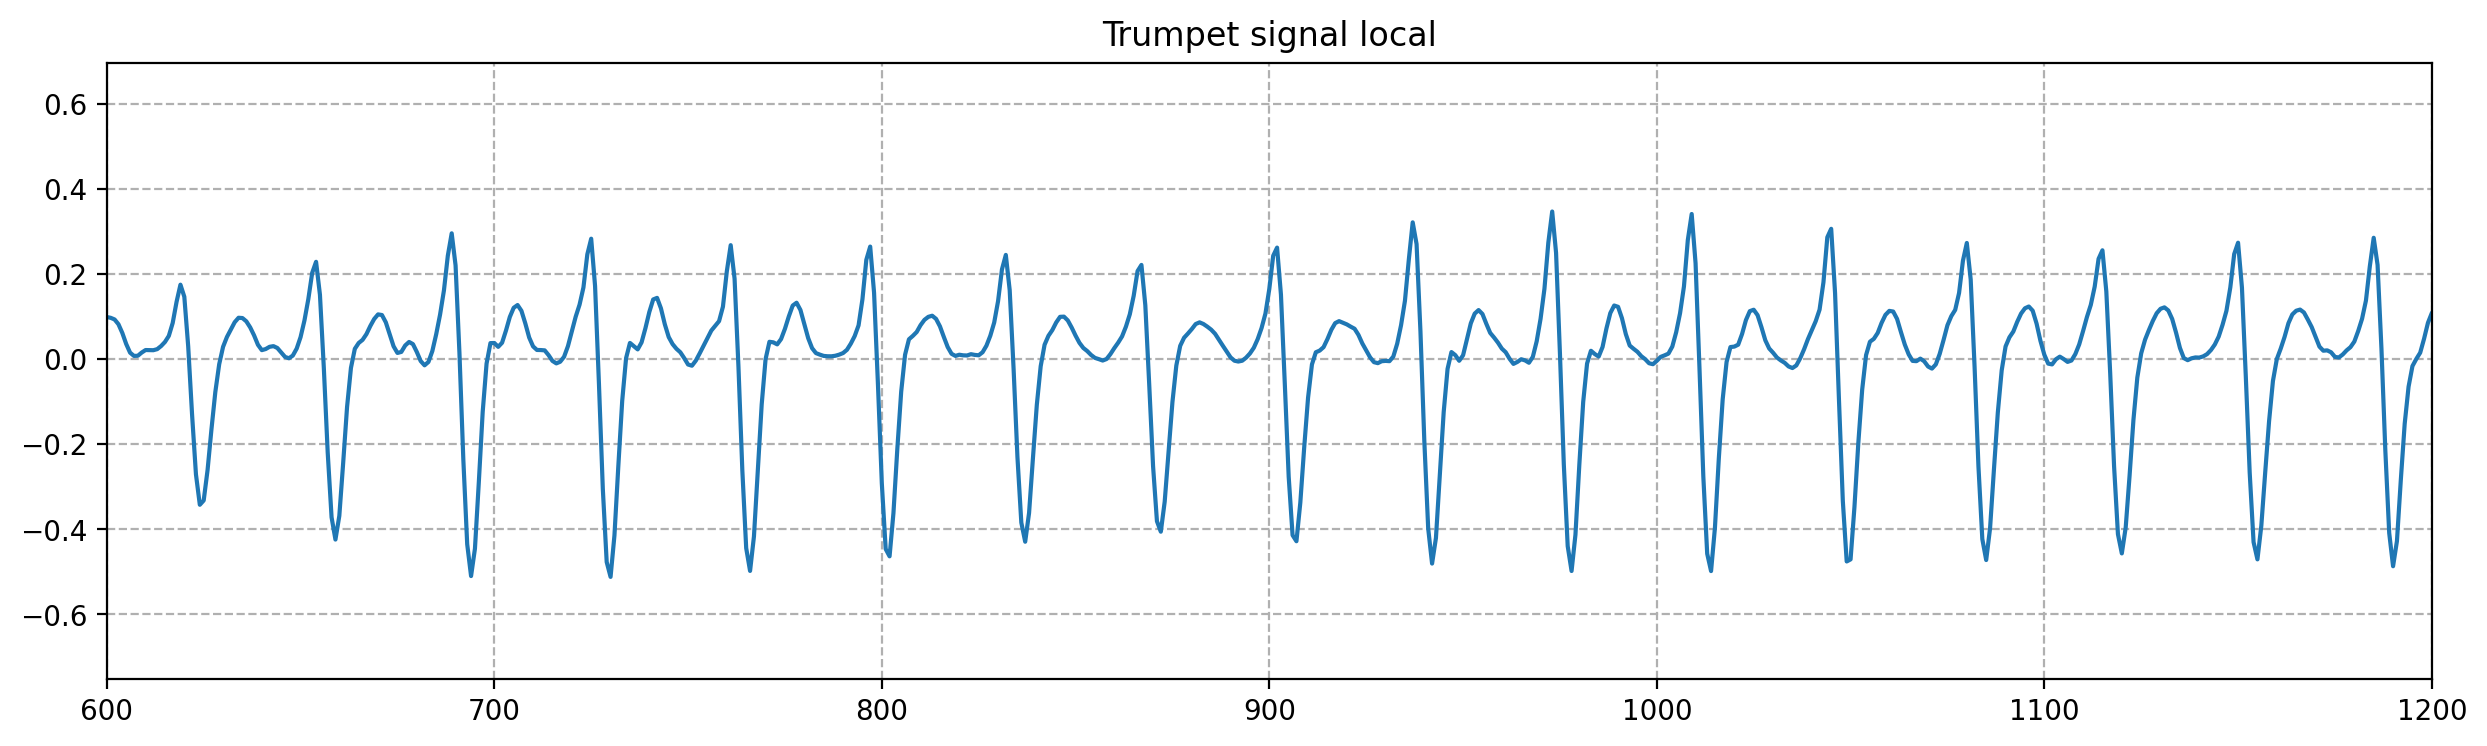

In [30]:
show(array, "Trumpet signal full")
show(array, "Trumpet signal local", (600, 1200))

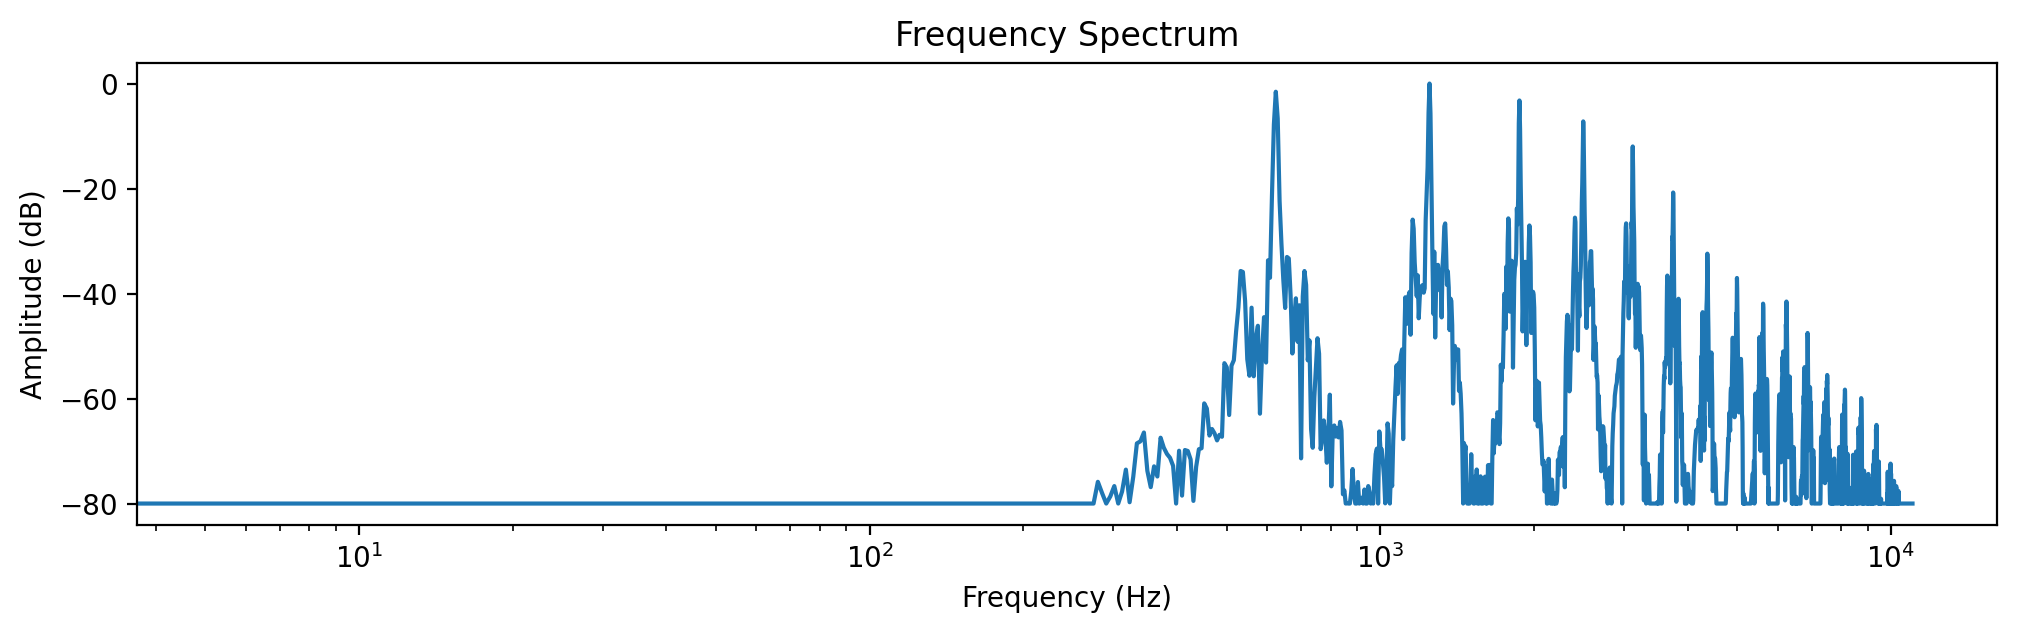

In [37]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

fig, ax = plt.subplots(figsize = (12,3))
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.title("Frequency Spectrum")
plt.xscale("log")